In [44]:
import numpy as np # linear algebra
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn import preprocessing
import plotly as plotly
import seaborn as sns
%matplotlib inline
from plotly import __version__
import plotly.offline as py 
from plotly.offline import init_notebook_mode, plot
init_notebook_mode(connected=True)
from plotly import tools
import plotly.graph_objs as go
import plotly.express as px
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [45]:
listings_df = pd.read_csv('./data/listings_cleaned_bristol_id.csv')
len(listings_df)

1592

In [46]:
sentfeatures_df = pd.read_csv('./data/bristol_sentiment_features.csv')
len(sentfeatures_df)

1341

In [47]:
result = sentfeatures_df.merge(listings_df, how="inner", left_on=['listing_id'],right_on=['id'])
result

,listing_id,avg_sentiment_score,proportion_positive,id,name,description,neighborhood_overview,host_since,host_about,host_response_time,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,70820,0.870781,0.993103,70820,384,141,1,3,237,3,...,9.0,10.0,10.0,10.0,9.0,2,0,2,0,1.80
1,117122,0.917494,0.992857,117122,381,743,0,5,397,3,...,10.0,10.0,10.0,10.0,10.0,1,0,1,0,1.26
2,176306,0.822666,0.947368,176306,1427,216,1,8,344,2,...,9.0,10.0,10.0,9.0,9.0,1,0,1,0,0.40
3,307634,0.871122,0.944444,307634,1035,424,0,17,464,3,...,10.0,10.0,10.0,10.0,9.0,2,0,2,0,0.51
4,322906,0.909380,0.962025,322906,728,326,0,13,76,3,...,9.0,10.0,10.0,9.0,9.0,2,0,2,0,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,45558834,0.916600,1.000000,45558834,1328,1092,1,206,64,4,...,10.0,10.0,10.0,10.0,10.0,1,0,1,0,1.00
1337,45763185,0.834050,1.000000,45763185,1279,230,0,410,478,4,...,9.0,9.0,10.0,10.0,9.0,3,3,0,0,2.00
1338,45810069,0.943900,1.000000,45810069,1253,888,0,674,482,4,...,10.0,10.0,10.0,10.0,10.0,1,0,1,0,1.00
1339,45820078,0.877000,1.000000,45820078,544,457,0,470,547,4,...,8.0,10.0,10.0,10.0,9.0,1,1,0,0,2.00


In [48]:
result.dtypes

listing_id                                        int64
avg_sentiment_score                             float64
proportion_positive                             float64
id                                                int64
name                                              int64
description                                       int64
neighborhood_overview                             int64
host_since                                        int64
host_about                                        int64
host_response_time                                int64
host_response_rate                                int64
host_acceptance_rate                              int64
host_neighbourhood                                int64
host_listings_count                               int64
host_total_listings_count                         int64
host_identity_verified                            int64
neighborhood                                      int64
neighborhood_group                              

In [49]:
result=result.dropna()

In [50]:
X = result.drop(['price'],axis = 1)
y = result['price']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [52]:
#gradient boost for predicting score
from sklearn.ensemble import GradientBoostingRegressor



In [53]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
GBoost.fit(X_train,y_train)
predictions = GBoost.predict(X_test)

In [54]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 20.56038117014332
MSE: 1937.6092571557074
RMSE: 44.018283214542876


In [55]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predictions.flatten()})
error_diff1 = error_diff.head(20)
error_diff1

,Actual Values,Predicted Values
0,36.0,36.786833
1,29.0,33.682365
2,35.0,37.581067
3,29.0,18.826293
4,35.0,84.198047
5,66.0,94.630341
6,27.0,32.545318
7,112.0,121.699154
8,120.0,368.119785
9,28.0,40.014989


In [56]:
import plotly.graph_objs as go
import plotly.express as px
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_diff1.index, y=error_diff['Predicted Values']),
    go.Bar(name='Actual', x=error_diff1.index, y=error_diff['Actual Values'])
])

fig.update_layout(barmode='group', title="Bristol - Gradient boosting price predictions", yaxis = dict(title ="Price"), xaxis =dict(title="Index"))
fig.show()

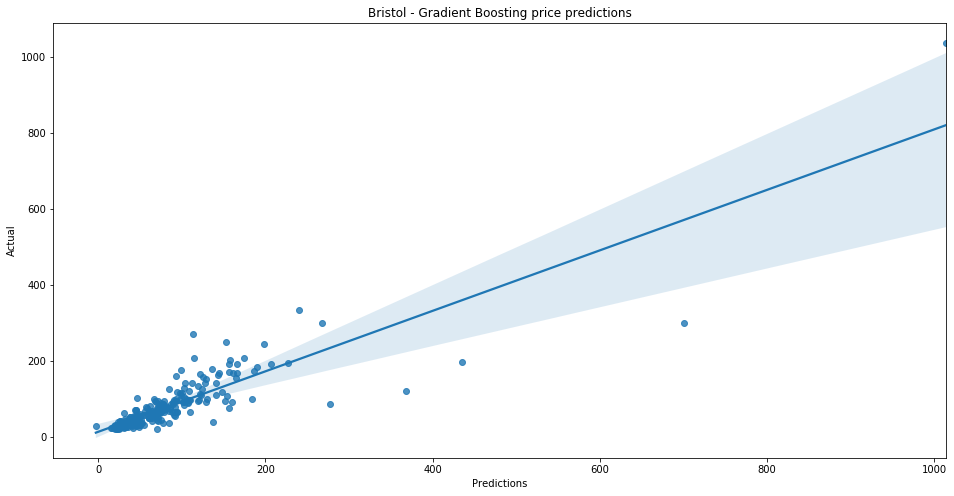

In [57]:
plt.figure(figsize=(16,8))
sns.regplot(predictions,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Bristol - Gradient Boosting price predictions")
plt.show()

In [58]:
# xgboost price predictions for amsterdam
import xgboost
import warnings 
warnings.simplefilter(action='ignore')

In [59]:
xgb = xgboost.XGBRegressor(n_estimators=310,learning_rate=0.1,objective='reg:squarederror')

In [60]:
xgb = xgboost.XGBRegressor(n_estimators=310,learning_rate=0.1,objective='reg:squarederror')
xgb.fit(X_train,y_train)
predictions = xgb.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 17.071890527202235
MSE: 791.4988210413096
RMSE: 28.1335888404112


In [61]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predictions.flatten()})
error_diff1 = error_diff.head(20)
error_diff1
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_diff1.index, y=error_diff['Predicted Values']),
    go.Bar(name='Actual', x=error_diff1.index, y=error_diff['Actual Values'])
])

fig.update_layout(barmode='group', title="Bristol - XGBoost price predictions", yaxis = dict(title ="Price"), xaxis =dict(title="Index"))
fig.show()

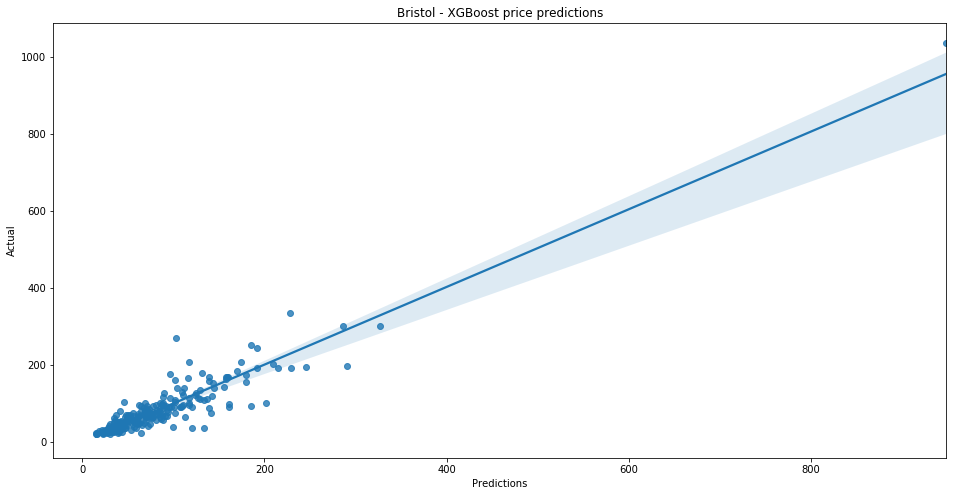

In [62]:
plt.figure(figsize=(16,8))
sns.regplot(predictions,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Bristol - XGBoost price predictions")
plt.show()

In [63]:
#gboost rating predictions
X = result.drop(['review_scores_rating'],axis = 1)
y = result['review_scores_rating']
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.2, random_state=101)

In [64]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
GBoost.fit(X_train_r,y_train_r)
predictions_r = GBoost.predict(X_test_r)

In [65]:
print('MAE:', metrics.mean_absolute_error(y_test_r, predictions_r))
print('MSE:', metrics.mean_squared_error(y_test_r, predictions_r))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_r, predictions_r)))

MAE: 2.099152005947384
MSE: 10.863843283584734
RMSE: 3.2960344785188056


In [66]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test_r).flatten(), 'Predicted Values': predictions_r.flatten()})
error_diff1 = error_diff.head(20)
error_diff1

,Actual Values,Predicted Values
0,99.0,96.367200
1,97.0,97.326512
2,99.0,98.000176
3,95.0,90.279071
4,96.0,92.606431
5,78.0,69.215962
6,99.0,99.156427
7,96.0,97.590061
8,90.0,93.997637
9,100.0,97.852460


In [73]:

title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_diff1.index, y=error_diff['Predicted Values']),
    go.Bar(name='Actual', x=error_diff1.index, y=error_diff['Actual Values'])
])

fig.update_layout(barmode='group', title="Bristol - Gradient Boosting rating predictions", yaxis = dict(title ="Rating"), xaxis =dict(title="Index"))
fig.show()

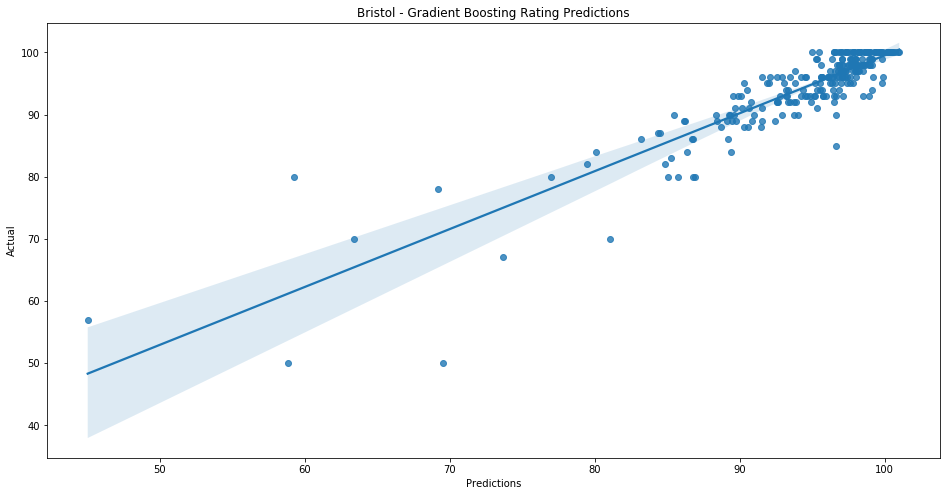

In [68]:
plt.figure(figsize=(16,8))
sns.regplot(predictions_r,y_test_r)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Bristol - Gradient Boosting Rating Predictions")
plt.show()

In [69]:
#xgboost rating predictions
xgb = xgboost.XGBRegressor(n_estimators=310,learning_rate=0.1,objective='reg:squarederror')
xgb.fit(X_train_r,y_train_r)
ypred_r = xgb.predict(X_test_r)

In [70]:
print('MAE:', metrics.mean_absolute_error(y_test_r, ypred_r))
print('MSE:', metrics.mean_squared_error(y_test_r, ypred_r))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_r, ypred_r)))

MAE: 2.2319093058186192
MSE: 12.181607256575703
RMSE: 3.49021593265742


In [74]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test_r).flatten(), 'Predicted Values': predictions_r.flatten()})
error_diff1 = error_diff.head(20)
error_diff1
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_diff1.index, y=error_diff['Predicted Values']),
    go.Bar(name='Actual', x=error_diff1.index, y=error_diff['Actual Values'])
])

fig.update_layout(barmode='group', title="Bristol - XGBoost rating predictions", yaxis = dict(title ="Rating"), xaxis =dict(title="Index"))
fig.show()

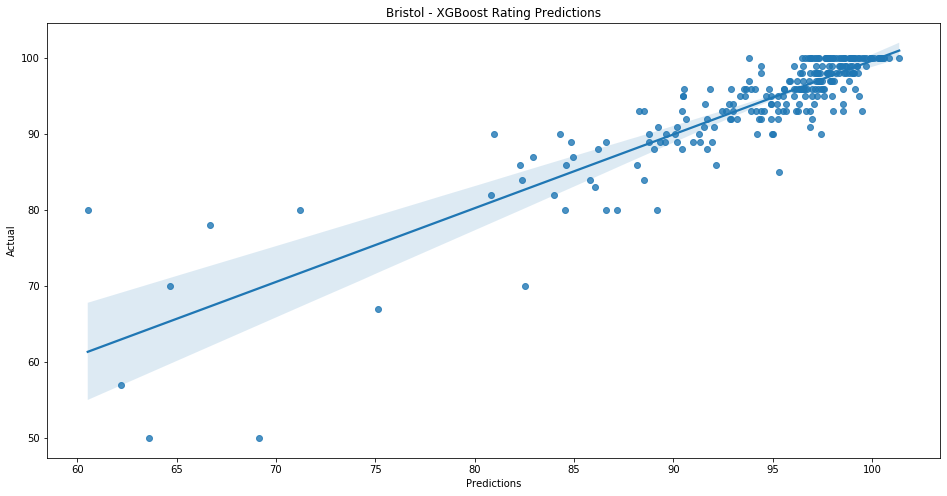

In [72]:
plt.figure(figsize=(16,8))
sns.regplot(ypred_r,y_test_r)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Bristol - XGBoost Rating Predictions")
plt.show()